In [1]:
import os
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from astropy.io import fits
from astropy.table import Table

In [2]:
# Cargar los datos a partir de los archivos FITS
path_datos = "../data_actualizada/"
path = path_datos + "ZW3.msw_image.fits"
hdul = fits.open(path)

Transformación del catálogo de fuentes completo (almacenado)

In [3]:

# ruta_carpeta_catalogos = "/home/21953404Victor/SDC3/SDC3GIT/catalogos/catalogo completo 1/resultados"
# ruta_carpeta_resultados = "/home/21953404Victor/SDC3/SDC3GIT/catalogos/catalogo completo 1/labels"
# archivos = os.listdir(ruta_carpeta_catalogos)

# # Función para crear un archivo de anotación para cada catálogo
# def crear_anotaciones(path_cat, path_anotacion):
#     cat = Table.read(path_cat, format="ascii")
#     clase = "fuente"

#     with open(path_anotacion, "w") as f:
#         for row in cat:
#             x = row["X_IMAGE"]
#             y = row["Y_IMAGE"]
#             f.write(f"{x} {y} {clase}\n")

# # Procesar todos los archivos de catálogo en la carpeta
# for archivo in archivos:
#     # Extraer el número de kHz del nombre del archivo
#     num_khz = re.search(r"(\d+)kHz", archivo).group(1)

#     # Crear un nombre para el archivo de anotación correspondiente
#     anotacion_nombre = f"catalogo_completo_1_{num_khz}kHz.txt"

#     # Crear el archivo de anotación para el catálogo actual
#     crear_anotaciones(
#         os.path.join(ruta_carpeta_catalogos, archivo),
#         os.path.join(ruta_carpeta_resultados, anotacion_nombre)
#    )


In [4]:
ruta_carpeta_resultados = "/home/21953404Victor/SDC3/SDC3GIT/catalogos/catalogo completo 1/labels"
archivos = os.listdir(ruta_carpeta_resultados)

def clamp(value, min_value, max_value):
    return max(min(value, max_value), min_value)

def procesar_archivo(path_txt):
    with open(path_txt, "r") as f:
        lines = f.readlines()

    label = np.zeros((2048, 2048), dtype=int)

    for line in lines:
        x, y, _ = line.split()
        x, y = int(float(x)), int(float(y))

        for i in range(-4, 4):
            for j in range(-4, 4):
                x_coord = clamp(x + i, 0, 2047)
                y_coord = clamp(y + j, 0, 2047)
                label[y_coord, x_coord] = 1

    return label

# Crear una lista para guardar los datos procesados
target=[]

# Procesar todos los archivos de texto en la carpeta de resultados
for archivo in archivos:
    path_txt = os.path.join(ruta_carpeta_resultados, archivo)
    label = procesar_archivo(path_txt)
    target.append(label)


In [5]:
np.count_nonzero(target[0])/64

1762.796875

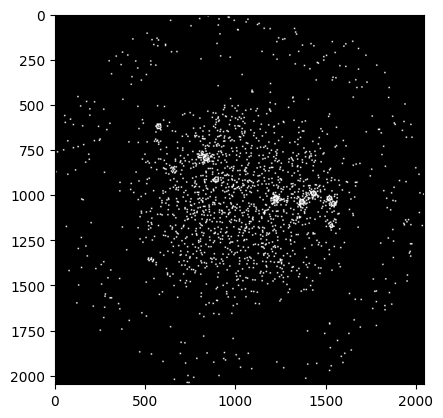

In [6]:
plt.imshow(target[800], cmap="gray")

In [5]:
# Configurar el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
# Cargar los datos y dividirlos en conjuntos de entrenamiento y validación
num_samples = len(hdul[0].data) # Cargar todos los datos en lugar de una muestra de todas las imágenes
all_data = hdul[0].data
indices = sorted(np.random.choice(all_data.shape[0], num_samples, replace=False))
data = all_data[indices]
input_data = np.array(data).astype("float32") / 255.0 # Normalizar los datos de entrada (en formato de 8 bits implica que cad píxel tenga un valor de 0 a 255)
input_data = input_data.reshape((data.shape[0], 1, data.shape[1], data.shape[2]))

# En lugar de repetir el label ahora se carga la lista de labels. El resto del proceso es igual
output_data = np.array(target).astype("float32")#[:, np.newaxis, :, :] # Agregar una dimensión para mantener el formato de los datos de entrada de la red neuronal


x_train, x_val, y_train, y_val = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_val = torch.from_numpy(x_val)
y_val = torch.from_numpy(y_val)

train_data = TensorDataset(x_train, y_train)
val_data = TensorDataset(x_val, y_val)

tam_lote=2

train_loader = DataLoader(train_data, batch_size=tam_lote, shuffle=True)
val_loader = DataLoader(val_data, batch_size=tam_lote, shuffle=False)

: 

: 

In [14]:
import os
import re
import numpy as np
from astropy.io import fits
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim


def get_frequency(filename):
    match = re.search(r'(\d+)kHz', filename)
    if match:
        return int(match.group(1))
    else:
        return -1

def get_image_number(filename):
    match = re.search(r'(\d+)\.fits', filename)
    if match:
        return int(match.group(1))
    else:
        return -1

ruta_carpeta_resultados = "/home/21953404Victor/SDC3/SDC3GIT/catalogos/catalogo completo 1/labels"
archivos = os.listdir(ruta_carpeta_resultados)
archivos = sorted(archivos, key=get_frequency)

# Cargar los datos a partir de los archivos FITS
path_datos = "../data_actualizada/"
fits_files = [f for f in os.listdir(path_datos) if f.endswith('.fits')]
fits_files = sorted(fits_files, key=get_image_number)

hduls = [fits.open(os.path.join(path_datos, f))[0] for f in fits_files]



ruta_carpeta_resultados = "/home/21953404Victor/SDC3/SDC3GIT/catalogos/catalogo completo 1/labels"

def get_frequency(filename):
    # Extraer la frecuencia del nombre del archivo
    match = re.search(r'(\d+)kHz', filename)
    if match:
        return int(match.group(1))
    else:
        return -1

archivos = os.listdir(ruta_carpeta_resultados)
archivos = sorted(archivos, key=get_frequency)



def clamp(value, min_value, max_value):
    return max(min(value, max_value), min_value)

def procesar_archivo(path_txt):
    with open(path_txt, "r") as f:
        lines = f.readlines()

    label = np.zeros((2048, 2048), dtype=int)

    for line in lines:
        x, y, _ = line.split()
        x, y = int(float(x)), int(float(y))

        for i in range(-4, 4):
            for j in range(-4, 4):
                x_coord = clamp(x + i, 0, 2047)
                y_coord = clamp(y + j, 0, 2047)
                label[y_coord, x_coord] = 1

    return label

class CustomDataset(Dataset):
    def __init__(self, data_paths, label_paths):
        self.data_paths = data_paths
        self.label_paths = label_paths

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        data_path = self.data_paths[idx]
        label_path = self.label_paths[idx]

        data = fits.open(data_path)[0].data.astype(np.float16) / 255.0
        data = data[np.newaxis, :, :]

        label = procesar_archivo(label_path).astype(np.float16)
        
        return torch.from_numpy(data), torch.from_numpy(label)

num_samples = len(hdul[0].data)
all_data = hdul[0].data
indices = sorted(np.random.choice(all_data.shape[0], num_samples, replace=False))

input_data_paths = [os.path.join(path_datos, f"ZW3.msw_image_{i}.fits") for i in indices]
output_data_paths = [os.path.join(ruta_carpeta_resultados, archivo) for archivo in archivos]

input_data_train, input_data_val, output_data_train, output_data_val = train_test_split(input_data_paths, output_data_paths, test_size=0.2, random_state=42)

train_data = CustomDataset(input_data_train, output_data_train)
val_data = CustomDataset(input_data_val, output_data_val)

tam_lote = 2

train_loader = DataLoader(train_data, batch_size=tam_lote, shuffle=True)
val_loader = DataLoader(val_data, batch_size=tam_lote, shuffle=False)




In [15]:
# Crear la CNN
encoder = nn.Sequential(
    nn.Conv2d(1, 32, 3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.ReLU()
)

decoder = nn.Sequential(
    nn.ConvTranspose2d(32, 32, 3, stride=2, padding=1, output_padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.ConvTranspose2d(32, 32, 3, stride=2, padding=1, output_padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.ConvTranspose2d(32, 1, 3, padding=1),
    nn.Sigmoid()
)

encoder = encoder.to(device)
decoder = decoder.to(device)

# Función de pérdida y optimizador
criterion = nn.BCELoss()

# Unimos los parámetros de encoder y decoder en un solo optimizador (convolución y deconvolución)
optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
#optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.0005) 

In [17]:
# Entrenamiento
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    encoder.train()
    decoder.train()
    train_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        enc_output = encoder(images)
        dec_output = decoder(enc_output)


        # Convertir las etiquetas a float
        labels_float = labels.float()

        loss = criterion(dec_output, labels_float)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        
    train_losses.append(train_loss / len(train_loader))
    
    encoder.eval()
    decoder.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            enc_output = encoder(images)
            dec_output = decoder(enc_output)
            dec_output = torch.squeeze(dec_output, dim=1) 
            
            # Convertir las etiquetas a float
            labels_float = labels.float()
            labels_float = torch.squeeze(labels_float, dim=1)
            
            loss = criterion(dec_output, labels_float)
            
            val_loss += loss.item()

    
    val_losses.append(val_loss / len(val_loader))
    
    print(f"Epoch {epoch+1}/{num_epochs}, Pérdida del train: {train_losses[-1]}, Pérdida del test: {val_losses[-1]}")

# Gráfico de pérdida
plt.plot(train_losses, label="Entrenamiento")
plt.plot(val_losses, label="Validación")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data_actualizada/ZW3.msw_image_580.fits'

In [ ]:
torch.save(decoder.state_dict(), 'decoder_gpu_cat_completo_pytorch.pt')
torch.save(encoder.state_dict(), 'encoder_gpu_cat_completo_pytorch.pt')